In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd_data = pd.read_csv('/workspaces/Pandas-Analises/SuperMarket/supermarket_sales.csv')
pd_data.head()

# conversao de data/hora
pd_data["Date"] = pd.to_datetime(pd_data["Date"])
pd_data["Hour"] = pd.to_datetime(pd_data["Time"]).dt.hour
pd_data["DayOfWeek"] = pd_data["Date"].dt.day_name()    

/tmp/ipykernel_9965/2423576873.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd_data["Hour"] = pd.to_datetime(pd_data["Time"]).dt.hour


In [7]:
print(pd_data.describe())
print(pd_data.nunique())

        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000                 4.761905   
75%   

In [13]:
# Analise por filial
sales_by_branch =  pd_data.groupby("Branch")["Total"].sum()
avg_ticket_by_branch = pd_data.groupby("Branch")["Total"].mean()


In [9]:
# Product top selling
top_products_by_branch = (
    pd_data.groupby(["Branch", "Product line"])["Quantity"]
    .sum()
    .reset_index()
    .sort_values(["Branch", "Quantity"], ascending=[True, False])
)

In [10]:
# Performance by city
branch_city_sales = pd_data.groupby(["City", "Branch"])["Total"].sum().reset_index()

In [15]:
# kind of customer
avg_spend_by_customer_type = pd_data.groupby("Customer type")["Total"].mean()
avg_spend_by_gender = pd_data.groupby("Gender")["Total"].mean()
avg_rating = pd_data.groupby(["Customer type", "Gender"])["Rating"].mean().reset_index()

In [17]:
# Product
revenue_by_product_line = pd_data.groupby("Product line")["Total"].mean()
avg_ticket_by_product_line = pd_data.groupby("Gender")["Total"].mean()
gross_income_by_product_line = pd_data.groupby("Product line")["gross income"].sum()

In [20]:
# Temporal
# --------------------------
daily_sales = pd_data.groupby("Date")["Total"].sum()
sales_by_hour = pd_data.groupby("Hour")["Total"].sum()
sales_by_day = pd_data.groupby("DayOfWeek")["Total"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# --------------------------
# Financeiro
# --------------------------
avg_gross_income = pd_data["gross income"].mean()
payment_counts = pd_data["Payment"].value_counts()
payment_revenue = pd_data.groupby("Payment")["Total"].sum()
cogs_total_corr = pd_data[["cogs", "Total"]].corr().loc["cogs", "Total"]


branch_city_sales         City Branch        Total
0   Mandalay      B  106197.6720
1  Naypyitaw      C  110568.7065
2     Yangon      A  106200.3705
avg_spend_by_customer_typeCustomer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64
avg_spend_by_gender Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64
avg_rating   Customer type  Gender    Rating
0        Member  Female  6.940613
1        Member    Male  6.940000
2        Normal  Female  6.990417
3        Normal    Male  7.018919
revenue_by_product_line Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64
avg_ticket_by_product_line Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64
gross_income_by_product_line Product line
Electronic accessories    258

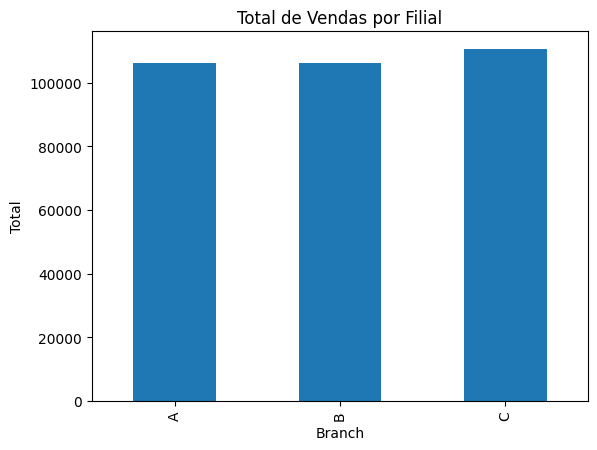

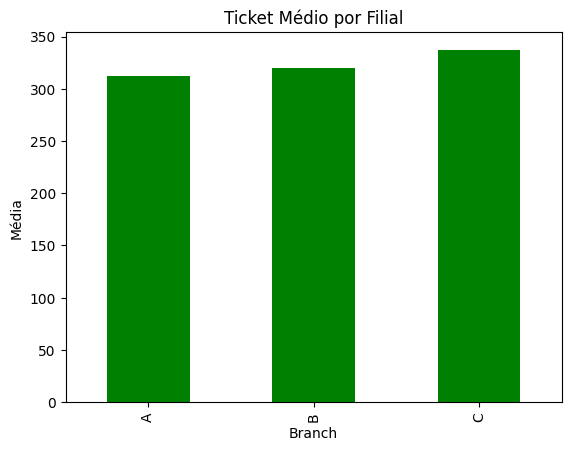

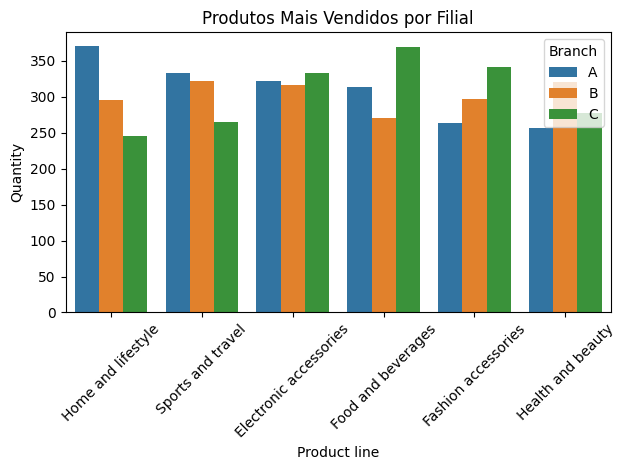

In [22]:
# Print Statistics
print(f"branch_city_sales {branch_city_sales}")
print(f"avg_spend_by_customer_type{avg_spend_by_customer_type}")
print(f"avg_spend_by_gender {avg_spend_by_gender}")
print(f"avg_rating {avg_rating}")
print(f"revenue_by_product_line {revenue_by_product_line}")
print(f"avg_ticket_by_product_line {avg_ticket_by_product_line}")
print(f"gross_income_by_product_line {gross_income_by_product_line}") 

print(f"daily_sales {daily_sales}")
print(f"sales_by_hour {sales_by_hour}")
print(f"sales_by_day {sales_by_day}")

#  Visualizações (Exemplos)
# --------------------------
# Total de vendas por filial
sales_by_branch.plot(kind="bar", title="Total de Vendas por Filial")
plt.ylabel("Total")
plt.show()

# Ticket médio por filial
avg_ticket_by_branch.plot(kind="bar", title="Ticket Médio por Filial", color="green")
plt.ylabel("Média")
plt.show()

# Produtos mais vendidos por filial
sns.barplot(data=top_products_by_branch, x="Product line", y="Quantity", hue="Branch")
plt.xticks(rotation=45)
plt.title("Produtos Mais Vendidos por Filial")
plt.tight_layout()
plt.show()
